In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp500 = yf.Ticker("MSFT")
sp500 = sp500.history(period="max")
today_data = sp500.iloc[-1]

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063504,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063504,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063503,0.064042,0.061350,0.061888,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061889,0.062427,0.060274,0.060812,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0
2023-11-24 00:00:00-05:00,377.329987,377.970001,375.140015,377.429993,10176600,0.0,0.0
2023-11-27 00:00:00-05:00,376.779999,380.640015,376.200012,378.609985,22179200,0.0,0.0


<Axes: xlabel='Date'>

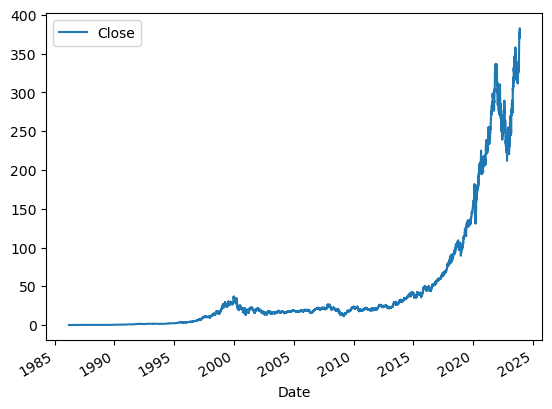

In [4]:
sp500.plot.line(y="Close", use_index=True)

In [5]:
# Clean up data
columns_to_remove = ["Dividends", "Stock Splits"]
sp500 = sp500.drop(columns=columns_to_remove)
sp500["Tomorrow"] = sp500["Close"].shift(-1)

# Shows whether the the price will increase or decrease
sp500["Trend"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

# Remove historical data where fundamental shifts in the market might affect prediction
sp500 = sp500.loc["1990-01-01":].copy()

# Remove todays data so we can train the model properly
sp500 = sp500.iloc[:-1]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Trend
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.375638,0.382095,0.370794,0.382095,53035200,0.384249,1
1990-01-03 00:00:00-05:00,0.385325,0.388554,0.381019,0.384249,113774400,0.395550,1
1990-01-04 00:00:00-05:00,0.384249,0.396088,0.382095,0.395550,125740800,0.385863,0
1990-01-05 00:00:00-05:00,0.393935,0.396088,0.385325,0.385863,69566400,0.391782,1
1990-01-08 00:00:00-05:00,0.385325,0.391782,0.381019,0.391782,58982400,0.390706,0
...,...,...,...,...,...,...,...
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,377.850006,1
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,377.429993,0
2023-11-24 00:00:00-05:00,377.329987,377.970001,375.140015,377.429993,10176600,378.609985,1


In [6]:
# Adding features to increase prediction accuracy
# sp500["PrevTrend"] = sp500["Trend"].shift(10).mean()

# sp500

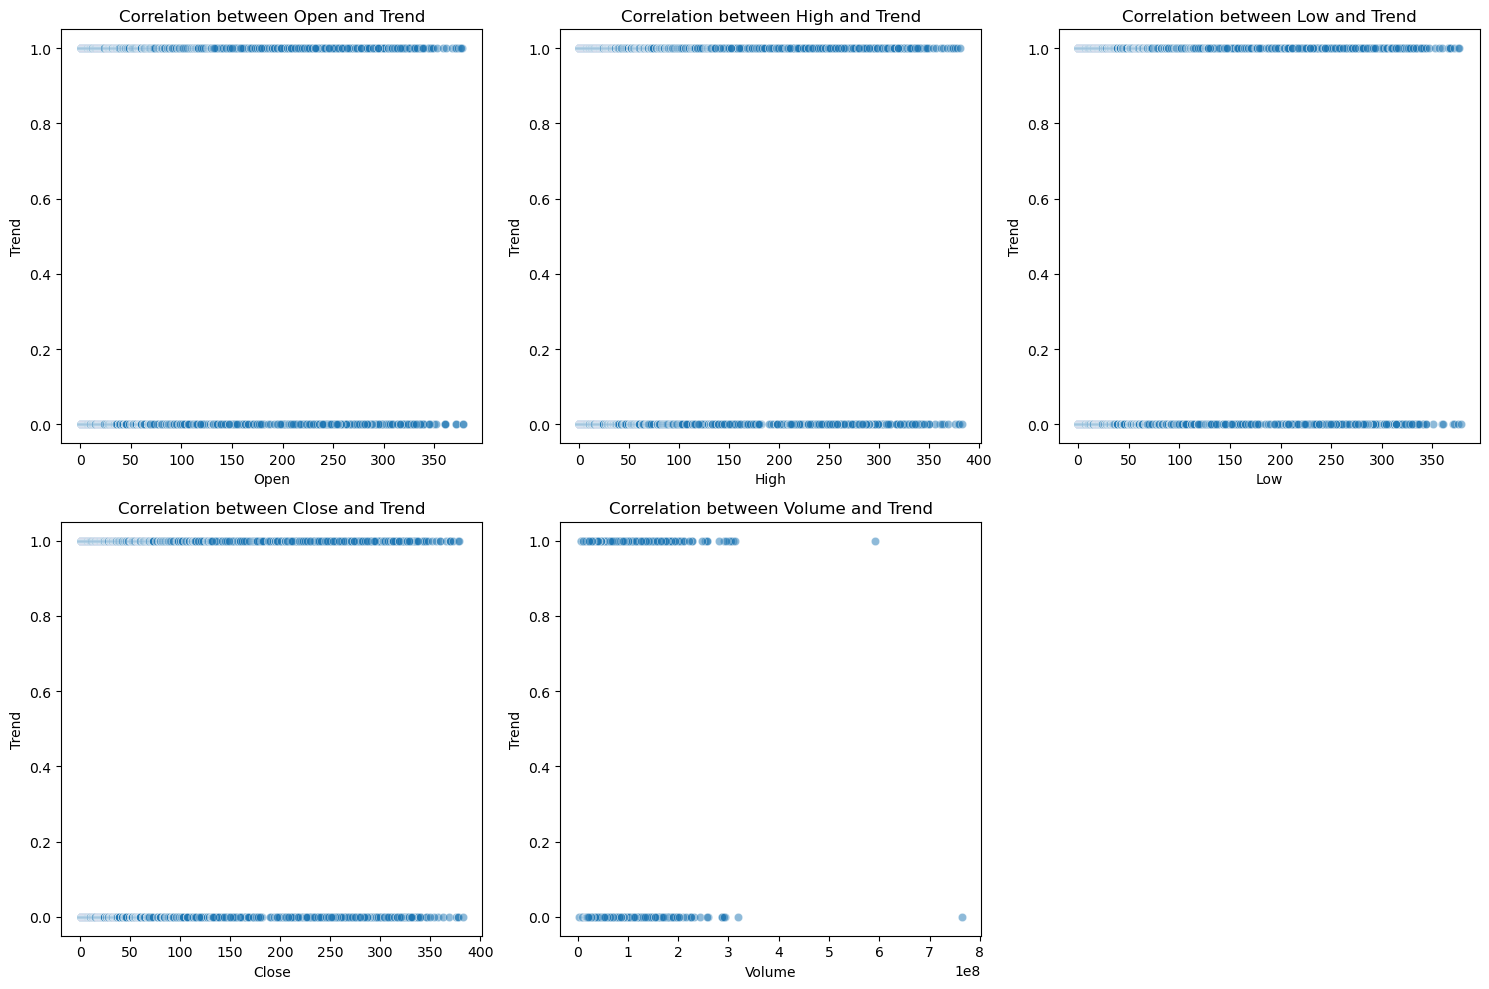

In [7]:
# Showing Data Correlation for trend
features = ["Open", "High", "Low", "Close", "Volume"]
label = 'Trend'

# Plot scatter plots for correlations
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=sp500, x=feature, y=label, alpha=0.5)
    plt.title(f'Correlation between {feature} and {label}')
    plt.xlabel(feature)
    plt.ylabel(label)

plt.tight_layout()
plt.show()

In [78]:
# Setting up data for training and testing
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Setting up linear regression Classifier for price prediction
linear_features = ["Open", "High", "Low", "Volume"]
X_train = train[linear_features]
y_train = train["Close"]

# Extracting the features for testing
X_test = test[linear_features]

In [80]:
# Creating the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

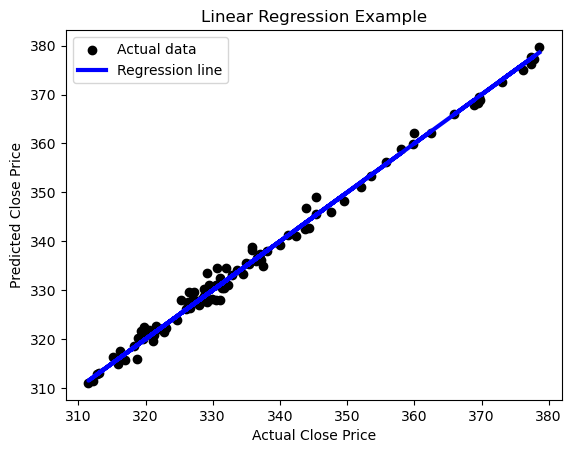

In [81]:
# Making predictions using the trained model
y_pred = model.predict(X_test)

# Visualizing the results
plt.scatter(test["Close"], y_pred, color='black', label='Actual data')
plt.plot(test["Close"], test["Close"], color='blue', linewidth=3, label='Regression line')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error
# Showing error
mse = mean_squared_error(test["Close"], y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.1953082953504985


In [13]:
# Add to data for trend prediction
X_test = sp500[linear_features]
data_pred = model.predict(X_test)

sp500["Predicted_Tomorrow_Close"] = data_pred
sp500["Predicted_Tomorrow_Close"] = sp500["Predicted_Tomorrow_Close"].shift(-1)
sp500 = sp500.dropna()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Trend,Predicted_Tomorrow_Close
Date,,,,,,,,
1990-01-02 00:00:00-05:00,0.375638,0.382095,0.370794,0.382095,53035200,0.384249,1,0.366931
1990-01-03 00:00:00-05:00,0.385325,0.388554,0.381019,0.384249,113774400,0.395550,1,0.372045
1990-01-04 00:00:00-05:00,0.384249,0.396088,0.382095,0.395550,125740800,0.385863,0,0.381367
1990-01-05 00:00:00-05:00,0.393935,0.396088,0.385325,0.385863,69566400,0.391782,1,0.382418
1990-01-08 00:00:00-05:00,0.385325,0.391782,0.381019,0.391782,58982400,0.390706,0,0.385343
...,...,...,...,...,...,...,...,...
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,373.070007,0,372.543360
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,377.850006,1,377.182963
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,377.429993,0,376.259694


In [14]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Setting up Random Forest Classifier for trend
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

rand_features = ["Open", "High", "Low", "Close", "Volume", "Predicted_Tomorrow_Close"]

# Tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 10, 50, 100],
}

randForest = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(randForest, param_grid, cv=3, scoring='accuracy')
grid_search.fit(train[rand_features], train["Trend"])

grid_search = GridSearchCV(randForest, param_grid, cv=3, scoring='accuracy')

# print("Tuned Hyperparameters:", grid_search.best_params_)
# print("Best Parameters:", grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [96]:
# True random forest model
randForest = RandomForestClassifier(n_estimators=200, min_samples_split=5, random_state=1)

In [97]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Trend"])
    
    # Make predictions on the test data
    preds = model.predict(test[predictors])
    
    # Create a pandas Series with predictions and appropriate index
    preds = pd.Series(preds, index=test.index, name="Predictions")
    
    # Combine the actual trend values and predictions into a DataFrame
    combined = pd.concat([test["Trend"], preds], axis=1)
    
    return combined

In [98]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    # Iterate over the data in chunks defined by start and step
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Get predictions using the predict function
        predictions = predict(train, test, predictors, model)
        
        # Append predictions to the list
        all_predictions.append(predictions)
    
    # Concatenate all predictions into a single DataFrame
    return pd.concat(all_predictions)

In [99]:
predictions = backtest(sp500, randForest, rand_features)
precision_score(predictions["Trend"], predictions["Predictions"])

0.6776920249908122

In [87]:
#Getting Prediction For today
today_features_lr = sp500.iloc[-1][linear_features].values.reshape(1, -1)
today_pred_lr = model.predict(today_features_lr)

# Predicting today's trend using the Random Forest Classifier
today_features_rf = sp500.iloc[-1][rand_features].values.reshape(1, -1)
today_pred_rf = randForest.predict(today_features_rf)

if today_pred_rf[0] == 0:
    print("Today is not a good day to invest as tomorrow will have a lower close price")
else:
    print("Today is a a good day to invest as tomorrow will have a higher close price")

Today is a a good day to invest as tomorrow will have a higher close price


C:\Users\Jmmurphy\Intro_to_AI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Jmmurphy\Intro_to_AI\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
